# Instruction of how to use Multimodal Spatial Description data

The data are available here: https://pub.uni-bielefeld.de/data/2913177

In [3]:
import sys
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib import colors as pltc
from mumodo import mumodoIO
%matplotlib inline

In [4]:
# set the corpus path here, replace this with your corpus path
CORPUS_PATH = "/Volumes/data/Corpora/Internal/DSG/VIRTUAL_DEIXIS_NOV15/"

In [5]:
# In this example, we will have a look at the description of scene5 from r1_20151126
participant_id = "r1_20151126" # participant ID
scene_num = 5 # scene ID

In [6]:
# load the timestamp when the recordings started
# we will use the timestamp to synchronize hand motion data with video recordings

start_time_file = os.path.join(CORPUS_PATH, "DerivedData/start_time.pkl")
start_time = pickle.load(open(start_time_file, "r"))
start_time[participant_id]

1448532360086

In [7]:
# load hand motion data... it will take a few seconds

hand_motion_file = os.path.join(CORPUS_PATH, "RawData/r1_20151126/r1_20151126.xio.gz")
sensor_name= 'VeniceHubReplay/Leap/Leapdata' # the sensorname when the data was logged
hand_motion = mumodoIO.open_streamframe_from_xiofile(hand_motion_file, sensorname=sensor_name)
hand_motion = hand_motion[hand_motion.HandNum > 0]
hand_motion.head()

opening compressed file ...
opening file without indexing


,ArmDirection,ArmLength,ArmWidth,DistDirection,DistLength,DistNextJoint,DistPrevJoint,ElbowPosition,FingerLength,FingerType,...,SphereCenter,SphereRadius,ThumbIndexAngle,TipDirection,TipPosition,ToolDirection,ToolNum,ToolPosition,WristPosition,time
8922,[-0.414042 0.726645 -0.548231],[242.831298828],[57.3081855774],"[0.301174 -0.280515 0.911376, 0.186131 -0.1489...","[21.0486164093, 15.3663625717, 16.901058197, 1...","[-51.2787 155.329 -33.6343, -35.0264 252.379 -...","[-44.9394 149.425 -14.4511, -32.1662 250.09 -3...",[141.176 -17.3973 156.958],"[46.8721694946, 52.8900146484, 60.2639274597, ...","[Thumb, Index, Middle, Ring, Pinky]",...,[-8.83212 202.559 -34.7238],[51.9352874756],[64.7817538332],"[-0.687301 0.172276 -0.705648, -0.283475 0.580...","[-49.8207 153.971 -29.2222, -34.3685 251.852 -...",[],0,[],[40.6335 159.055 23.8308],1448532364815
8940,[-0.590547 0.60954 -0.528882],[242.831283569],[57.3081855774],"[0.36401 -0.271267 0.891017, 0.263542 -0.11630...","[21.0486183167, 15.366361618, 16.9010620117, 1...","[-61.5018 161.708 -25.6977, -41.3787 256.274 -...","[-53.8399 155.998 -6.94304, -37.329 254.487 -3...",[178.645 13.2923 151.725],"[46.8721694946, 52.8900146484, 60.2639274597, ...","[Thumb, Index, Middle, Ring, Pinky]",...,[-15.8014 207.261 -31.6524],[51.6385726929],[64.3977947597],"[-0.736054 0.194347 -0.648423, -0.318285 0.563...","[-59.7476 160.363 -21.3826, -40.3681 256.036 -...",[],0,[],[35.2415 161.308 23.2957],1448532364833
8957,[-0.65587 0.568972 -0.49609],[242.831298828],[57.3081855774],"[0.386621 -0.274615 0.880404, 0.290458 -0.1117...","[21.0486125946, 15.3663654327, 16.9010562897, ...","[-66.8478 162.81 -22.6832, -47.0155 256.83 -46...","[-58.7099 157.03 -4.15195, -42.5522 255.113 -3...",[190.45 23.4961 144.094],"[46.8721694946, 52.8900146484, 60.2639274597, ...","[Thumb, Index, Middle, Ring, Pinky]",...,[-19.832 208.262 -30.655],[51.7238922119],[64.0677668583],"[-0.752034 0.200444 -0.627907, -0.33848 0.5611...","[-64.9911 161.4 -18.4175, -45.8322 256.684 -43...",[],0,[],[31.1841 161.66 23.6281],1448532364850
8975,[-0.792762 0.418905 -0.442772],[242.831283569],[57.3081855774],"[0.426501 -0.317233 0.84703, 0.35832 -0.137221...","[21.048614502, 15.3663673401, 16.901058197, 16...","[-83.3014 169.087 -11.4904, -53.7983 259.135 -...","[-74.3242 162.409 6.3384, -48.2923 257.027 -25...",[210.093 53.6317 133.386],"[46.8721694946, 52.8900146484, 60.2639274597, ...","[Thumb, Index, Middle, Ring, Pinky]",...,[-30.6435 209.139 -24.0709],[51.6731719971],[63.8206096399],"[-0.774598 0.293472 -0.560242, -0.331338 0.590...","[-81.2228 167.418 -7.47434, -52.2751 258.923 -...",[],0,[],[17.585 155.355 25.8673],1448532364868
8993,[-0.837531 0.321536 -0.441764],[242.831283569],[57.3081855774],"[0.4916 -0.405559 0.770618, 0.433874 -0.22008 ...","[21.0486183167, 15.3663597107, 16.9010601044, ...","[-91.2245 172.546 -4.46135, -58.0287 261.854 -...","[-80.877 164.01 11.7591, -51.3617 258.472 -17....",[215.314 71.5625 128.153],"[46.8721694946, 52.8900146484, 60.2639274597, ...","[Thumb, Index, Middle, Ring, Pinky]",...,[-36.009 210.98 -19.7557],[51.6488990784],[63.6768341619],"[-0.808083 0.382358 -0.448111, -0.358887 0.657...","[-88.6991 170.39 -1.14917, -56.1621 261.343 -2...",[],0,[],[11.9354 149.642 20.8788],1448532364886


In [8]:
# synchronize hand motion data with video
# now the index of the data frame indicates the timing of corresponding video

hand_motion = hand_motion[hand_motion.time >= start_time[participant_id]]
hand_motion.index = list(hand_motion['time'].map(lambda x: x - start_time[participant_id]))

In [10]:
# load transcriptions and gesture annotations
annotation_file = os.path.join(CORPUS_PATH, "DerivedData/r1_20151126/r1.TextGrid")

# speech transcriptions from native German speakers
annotations = mumodoIO.open_intervalframe_from_textgrid(annotation_file)

# episodes annotated with scene ID
episodes = annotations['episode']

# words aligned with the audio using a forced alignment approach
aligned_words = annotations['forced_alignment']

In [11]:
# load scene information as a list. Each scene is represented as a dictionary, with object center positions,
# object size, shape and color
scene_info_file = CORPUS_PATH + "images/scene_info.pkl"
scene_info = pickle.load(open(scene_info_file, "r"))

### Now we plot the verbal descriptions and annotated gestures of Scene 5 by r1

In [12]:
def draw_scene(objects, scene_size):
    """draw a scene that contains the given objects"""
    
    fig = plt.figure(figsize=(scene_size, scene_size))
    plt.axis("off")
    ratio = scene_size/14.0
    for obj in objects:
        if obj["shape"] == 'circle':
            temp = plt.Circle(obj['center'], radius=obj['size']*ratio, fc=obj['color'], ec='none')
        else:
            temp = plt.Rectangle([obj['center'][0]-obj['size']/2.0, obj['center'][1]-obj['size']/2.0],
                                 2*obj['size']*ratio, 2*obj['size']*ratio, fc=obj['color'], ec='none')
        plt.gca().add_patch(temp)

    

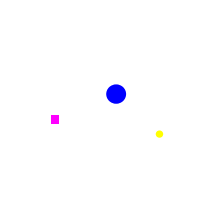

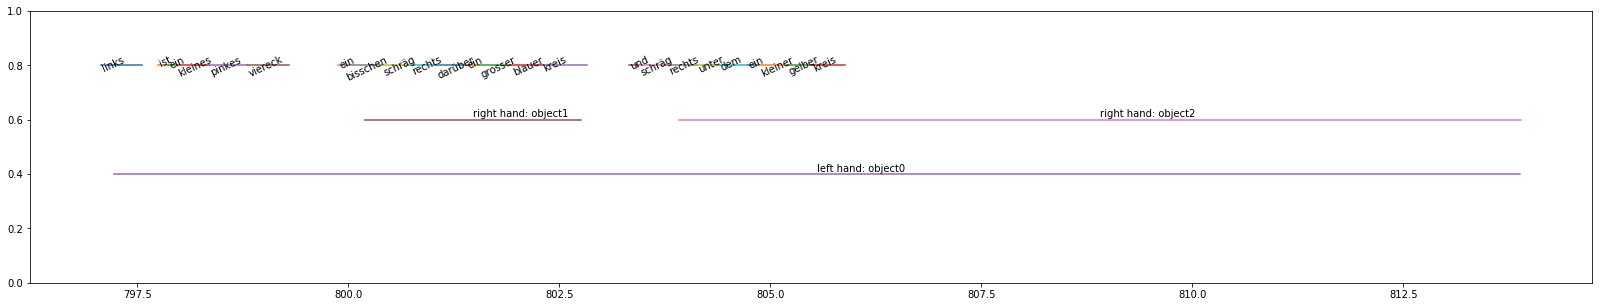

In [13]:
# plot the scene, verbal and gestural descriptions
draw_scene(scene_info[scene_num], 3)

this_epi = episodes[episodes.text == "scene"+str(scene_num)]
start_time = this_epi['start_time'].iloc[0]
end_time = this_epi['end_time'].iloc[0]
objs = annotations['speech_objID']
objs = objs[(objs.start_time<end_time)&(objs.end_time>start_time)]

fig1 = plt.figure(figsize=(28, 5))
plt.ylim([0, 1])
for ix, row in objs.iterrows():
    objID = row['text']
    obj_description = aligned_words[(aligned_words.start_time <= row['end_time']) & \
                                  (aligned_words.end_time >= row['start_time'])]
    obj_description = obj_description[obj_description.text != "<sil>"]
    y_pos = 0.8 - int(objID[-1])*0.3
    for _, r in obj_description.iterrows():
        plt.plot([r['start_time'], r['end_time']], [0.8, 0.8], '-')
        plt.text(r['start_time'], 0.81, r['text'], rotation=25)
        
# plot gestures
y_pos = {'left_objID': 0.4, 'right_objID': 0.6}
for item in ['left_objID', 'right_objID']:
    gestures = annotations[item]
    gestures = gestures[(gestures.start_time <end_time)&(gestures.end_time>start_time)]
    for ix, row in gestures.iterrows():
        plt.plot([row['start_time'], row['end_time']], [y_pos[item], y_pos[item]], '-')
        plt.text((row['start_time']+row['end_time'])*0.5, y_pos[item]+0.01, item.split('_')[0] + " hand: "+row['text'])

### We can access the hand motion data of a gesture with its annotated start and end time

In [14]:
# right hand gestures from r1
gestures

,start_time,end_time,text
88,800.195,802.761,object1
89,803.917,813.899,object2


In [15]:
# select the data via index
hand_motion.ix[800195:802761]

,ArmDirection,ArmLength,ArmWidth,DistDirection,DistLength,DistNextJoint,DistPrevJoint,ElbowPosition,FingerLength,FingerType,...,SphereCenter,SphereRadius,ThumbIndexAngle,TipDirection,TipPosition,ToolDirection,ToolNum,ToolPosition,WristPosition,time
800206,[-0.513498 0.550809 -0.657974],[246.079666138],[58.0748023987],"[0.957101 0.277006 0.0850064, -0.633068 -0.072...","[21.3301849365, 15.5719175339, 17.1271495819, ...","[-84.1339 153.965 -117.737, -20.4947 178.096 -...","[-63.7187 159.873 -115.924, -30.3528 176.963 -...",[145.063 60.5399 76.017],"[47.4991836548, 53.597530365, 61.0700836182, 5...","[Thumb, Index, Middle, Ring, Pinky]",...,[-40.7654 187.56 -136.013],[38.4185371399],[61.5524541438],"[-0.900736 -0.235132 -0.365223, 0.774531 -0.44...","[-79.6857 155.047 -115.115, -23.3297 178.519 -...",[],0,[],[18.7014 196.083 -85.8969],1448533160292
800224,[-0.522239 0.542881 -0.657683],[246.079666138],[58.0748023987],"[0.956976 0.271559 0.102239, -0.62076 -0.06515...","[21.3301849365, 15.5719146729, 17.1271495819, ...","[-84.0812 152.944 -121.366, -20.4904 177.121 -...","[-63.6688 158.737 -119.186, -30.1568 176.107 -...",[146.959 60.3673 74.4071],"[47.4991836548, 53.597530365, 61.0700836182, 5...","[Thumb, Index, Middle, Ring, Pinky]",...,[-40.5509 186.75 -138.23],[38.3310966492],[61.6656303752],"[-0.896827 -0.223579 -0.381725, 0.769116 -0.45...","[-79.6861 153.959 -118.768, -23.2472 177.426 -...",[],0,[],[18.4468 193.959 -87.4352],1448533160310
800242,[-0.525527 0.540664 -0.656889],[246.079666138],[58.0748023987],"[0.955711 0.272671 0.110754, -0.612626 -0.0673...","[21.3301925659, 15.5719194412, 17.1271457672, ...","[-83.8479 152.524 -122.534, -20.4265 176.994 -...","[-63.4624 158.34 -120.172, -29.9663 175.946 -1...",[147.652 60.3967 74.0454],"[47.4991836548, 53.597530365, 61.0700836182, 5...","[Thumb, Index, Middle, Ring, Pinky]",...,[-40.3783 186.547 -138.765],[38.2719993591],[61.7270884157],"[-0.893676 -0.221962 -0.38997, 0.767705 -0.449...","[-79.4824 153.532 -119.976, -23.1193 177.193 -...",[],0,[],[18.331 193.443 -87.6017],1448533160328
800261,[-0.525576 0.539502 -0.657805],[246.079681396],[58.0748023987],"[0.954459 0.275264 0.115053, -0.606867 -0.0784...","[21.3301868439, 15.5719223022, 17.1271419525, ...","[-83.5067 152.877 -122.91, -20.2347 177.416 -1...","[-63.1479 158.748 -120.456, -29.6848 176.195 -...",[147.649 61.5593 74.2114],"[47.4991836548, 53.597530365, 61.0700836182, 5...","[Thumb, Index, Middle, Ring, Pinky]",...,[-40.013 186.76 -139.147],[38.2219352722],[61.6328181474],"[-0.890193 -0.227479 -0.394727, 0.765374 -0.44...","[-79.167 153.926 -120.395, -22.8759 177.547 -1...",[],0,[],[18.3151 194.32 -87.661],1448533160347
800278,[-0.523566 0.537021 -0.661428],[246.079666138],[58.0748023987],"[0.952681 0.28069 0.116674, -0.604116 -0.08688...","[21.3301887512, 15.5719242096, 17.127155304, 1...","[-82.961 153.052 -123.241, -19.9303 177.88 -12...","[-62.6402 159.039 -120.753, -29.3376 176.527 -...",[147.346 63.0592 74.8603],"[47.4991836548, 53.597530365, 61.0700836182, 5...","[Thumb, Index, Middle, Ring, Pinky]",...,[-39.6097 187.015 -139.53],[38.1730232239],[61.5198058405],"[-0.887541 -0.234252 -0.396732, 0.766215 -0.43...","[-78.637 154.144 -120.779, -22.5271 177.959 -1...",[],0,[],[18.5068 195.209 -87.9037],1448533160364
800297,[-0.52229 0.535454 -0.663703],[246.079650879],[58.0748023987],"[0.951516 0.284095 0.117931, -0.60234 -0.09233...","[21.3301868439, 15.5719184875, 17.1271514893, ...","[-82.6035 153.169 -123.475, -19.7167 178.173 -...","[-62.3075 159.229 -120.96, -29.0963 176.735 -1...",[147.152 64.0066 75.2657],"[47.4991836548, 53.597530365, 61.0700836182, 5...","[Thumb, Index, Middle, Ring, Pinky]",...,[-39.3506 187.181 -139.757],[38.1423149109],[61.4789681406],"[-0.885729 -0.238473 -0.398264, 0.766754 -0.43...","[-78.2885 154.29 -121.062, -22.2962 178.221 -1...",[],0,[],[18.6265 195.771 -88.0581],1448533160383
800315,[-0.520369 0.533515 -0.666767],[246.079666138],[58.0748023987],"[0.950202 0.289056 0.1164